# Linear regression via gradient descent: function edition

We want to find the vector $\theta$ that minimizes the loss/cost function $J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$, where $h_\theta(x^{(i)}) = \theta^T X_i$.

Gradient descent begins with $\theta_{\text{init}}$, some initial value(s) for elements $j=0, ..., n$, then updates $\theta$ iteratively such that $\theta_j := \theta_j - \alpha \dfrac{\partial J(\theta)}{\partial \theta_j}$, where $\alpha$ is a learning rate or step size parameter. In this way, we are taking first order steps along the gradient towards the direction with lower $J(\theta)$.

The partial derivative of the cost function with respect to parameter $\theta_j$ is $\dfrac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$, which means that the update rule can be written as $\theta_j := \theta_j - \alpha \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$.

In this implementation I'll try to avoid global variables and use functions instead.

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')


class LinearModel(object):
    """Define and fit linear models"""
    
    
    def __init__(self, X, y):
        """Initializing a model
            
    Args: 
        X (numpy.array): n-by-p design matrix
        y (vector): n-vector of responses
        """
        self.X = X
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.y = y
    
    
    def predict(self, theta):
        """Compute hypothesis function X * theta

        Args: 
            X: Design matrix
            theta: parameter vector

        Returns: 
            prediction: the product of X and theta
        """
        prediction = self.X.dot(theta)
        return prediction
    
    
    def partial_J(self, theta, j):
        """Computes partial derivative of J wrt theta

        Args: 
            j: index for a coefficient (element in theta)

        Returns: 
            dJ/dtheta_j (float)
        """
        return sum((self.predict(theta) - self.y) * self.X[:, j])

    
    def optimize(self, alpha, iters):
        """Implements gradient descent

        Args: 
            alpha: (float) learning rate
            iters: (int) number of iterations (steps to take)

        Returns: 
            theta_out: (numpy array) value of theta at each iteration
        """
        theta = np.random.normal(size = self.p)
        theta_out = np.empty([iters, self.p])
        for i in range(iters):
            print(theta)
            theta_out[i, :] = theta
            for j in range(self.p):
                theta[j] = theta[j] - alpha * self.partial_J(theta, j)
        self.theta_out = theta_out


In [43]:
## Define parameters as global variables
N = 10000  # sample size
p = 4     # number of coefficients
sigma = 2

# make design matrix
X = np.column_stack((np.repeat(1, N), np.random.rand(N, p - 1)))
print(X.shape)

# assign true coefficients
true_theta = np.random.normal(0, 10, p)
print(true_theta)

# generate response vector
y = X.dot(true_theta) + np.random.normal(0, sigma, N)

(10000, 4)
[  3.93898702 -10.94913204   5.65391428  -6.2970982 ]


Now, we can initialize the parameters at some random, dispersed values, choose the learning rate, and iteratively update our parameter vector using gradient descent.

In [50]:
m = LinearModel(X, y)
m.optimize(alpha = .0003, iters = 100)

[-0.07420003 -0.6451246   0.69217688  2.3446767 ]
[-9.1466574   5.83170744  6.2047019   0.14871592]
[-5.80308302 -1.8297375   8.59164698 -0.82263781]
[-3.02489463 -6.96649504  9.01261764 -1.39275747]
[ -0.58180715 -10.46004291   8.40272686  -1.93714394]
[  1.55691637 -12.76178112   7.33575663  -2.58879692]
[  3.34940726 -14.13260852   6.16957767  -3.35507341]
[  4.7467526  -14.75876951   5.12247034  -4.18493285]
[  5.72344492 -14.80231738   4.31579022  -5.00811055]
[  6.28753847 -14.41796877   3.80076757  -5.75757806]
[  6.47927416 -13.75384266   3.5779547   -6.38148929]
[  6.36363289 -12.94575184   3.61304448  -6.84822492]
[  6.02035988 -12.11030072   3.85040504  -7.1468514 ]
[  5.53378494 -11.33946833   4.22459539  -7.28463567]
[  4.98391269 -10.69780928   4.669736    -7.28286532]
[  4.43961736 -10.22246852   5.126569    -7.17194943]
[ 3.95428464 -9.92565561  5.54716099 -6.98654603]
[ 3.56387093 -9.79893531  5.89736995 -6.76125121]
[ 3.28708672 -9.81858477  6.15735443 -6.52718821]
[ 

Last, plot the results to evaluate convergence and parameter recovery.

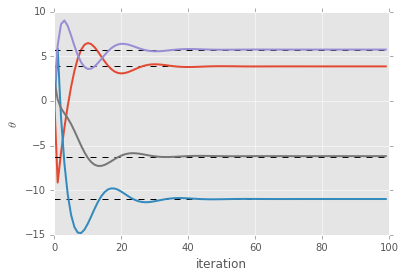

In [51]:
for i in range(m.theta_out.shape[1]):
    plt.axhline(true_theta[i], linestyle = 'dashed', color = 'black')
    plt.plot(range(m.theta_out.shape[0]), m.theta_out[:, i], lw = 2)
    plt.xlabel('iteration')
    plt.ylabel(r'$\theta$')